## **Modelo de Ridge con Hiperparámetros Ajustados**

**Objetivo**

Mejorar el modelo de regresión lineal utilizando Ridge Regression con ajuste de hiperparámetros para lograr un mejor rendimiento y evitar el sobreajuste.

## **Importación y preprocesamiento de datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargar los datasets usando los enlaces directos a los archivos CSV con codificación 'latin1' y el delimitador correcto
personal_activo_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Personal_Activo_Industria.csv', encoding='latin1', delimiter=';')
establecimientos_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Establecimientos_industriales.csv', encoding='latin1', delimiter=';')
produccion_confeccionista_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Confeccionista.csv', encoding='latin1', delimiter=';')
produccion_electronica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Electronica.csv', encoding='latin1', delimiter=';')
produccion_pesquera_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Pesquera.csv', encoding='latin1', delimiter=';')
produccion_textil_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Textil.csv', encoding='latin1', delimiter=';')
produccion_plastica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Plastica.csv', encoding='latin1', delimiter=';')
produccion_otros_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Otros.csv', encoding='latin1', delimiter=';')

# Limpiar los nombres de las columnas eliminando espacios en blanco extra
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.columns = df.columns.str.strip()

# Diccionario para convertir los nombres de los meses en español a números
meses = {
    'Enero': '01', 'enero': '01', 'Febrero': '02', 'febrero': '02', 'Marzo': '03', 'marzo': '03',
    'Abril': '04', 'abril': '04', 'Mayo': '05', 'mayo': '05', 'Junio': '06', 'junio': '06',
    'Julio': '07', 'julio': '07', 'Agosto': '08', 'agosto': '08', 'Septiembre': '09', 'septiembre': '09',
    'Octubre': '10', 'octubre': '10', 'Noviembre': '11', 'noviembre': '11', 'Diciembre': '12', 'diciembre': '12'
}

# Función para reemplazar los nombres de los meses en español por números y manejar NaN
def convertir_fecha(row):
    if pd.isna(row['Año']) or pd.isna(row['Mes']):
        return pd.NaT
    año = str(int(row['Año']))
    mes = str(row['Mes']).strip()
    mes = meses.get(mes, '01')  # Asignar '01' como valor predeterminado si el mes no se encuentra en el diccionario
    return pd.to_datetime(f'{año}-{mes}', format='%Y-%m')

# Aplicar la función para crear la columna 'Fecha' en cada dataset
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df['Fecha'] = df.apply(convertir_fecha, axis=1)

# Establecer la columna 'Fecha' como el índice para todos los datasets
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.set_index('Fecha', inplace=True)

# Manejar valores faltantes reemplazando NaN con 0
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.fillna(0, inplace=True)

# Crear una columna 'Total' sumando las columnas existentes en personal_activo_df
personal_activo_df['Total'] = personal_activo_df[['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras']].sum(axis=1)

# Convertir los nombres de los meses a números en el dataframe de personal_activo_df
personal_activo_df['Mes'] = personal_activo_df.index.month

# Definir X (características) y y (variable objetivo)
X = personal_activo_df.drop(columns='Total')
y = personal_activo_df['Total']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## **Ajuste de Hiperparámetros**

## **Entrenamiento y Evaluación del Modelo**

In [ ]:
# Ajuste de hiperparámetros usando GridSearchCV con Ridge
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
best_model.fit(X_train_imputed, y_train)

# Predicciones y evaluación
y_pred = best_model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo de Ridge con Hiperparámetros Ajustados")
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Modelo de Ridge con Hiperparámetros Ajustados
Mejores Hiperparámetros: {'alpha': 0.1, 'solver': 'auto'}
Mean Squared Error: 9.108228739648518e-08
Mean Absolute Error: 0.00023938539023037582
R2 Score: 0.9999999999997289


**Análisis de las Métricas**

- Mean Squared Error (MSE): Este valor extremadamente bajo indica que las predicciones del modelo están muy cerca de los valores reales. El MSE cercano a cero sugiere que el modelo tiene una precisión excelente, minimizando casi por completo los errores cuadrados promedio.

- Mean Absolute Error (MAE): El MAE también es extremadamente bajo, lo que implica que, en promedio, las predicciones del modelo se desvían en una fracción muy pequeña de los valores reales. Esto refuerza la precisión del modelo en términos de errores absolutos.

- R2 Score: Un R2 casi perfecto de 1 (0.9999999999997289) indica que el modelo explica casi el 100% de la variabilidad en los datos. Esto es un rendimiento excepcional y sugiere que el modelo de Ridge está capturando muy bien las relaciones en los datos.

## **Visualización Resultados**

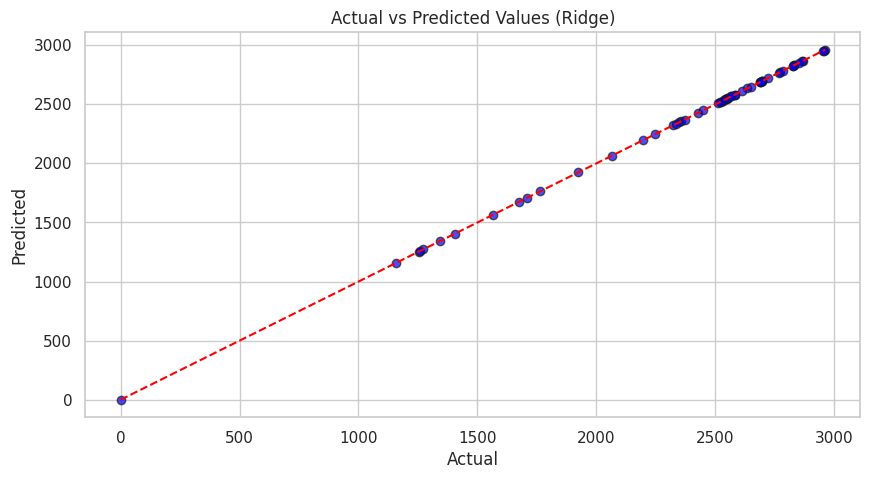

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Ridge)')
plt.show()

## **Conclusión**

El modelo de Ridge también muestra un rendimiento excepcional con métricas casi perfectas, lo que sugiere que es muy efectivo para este conjunto de datos y podría tener un mejor equilibrio frente al sobreajuste.

Dado el excelente desempeño del modelo de Ridge con los hiperparámetros ajustados, parece que hemos encontrado una solución muy precisa para predecir la cantidad de personal activo en los establecimientos industriales.
Las métricas indican que el modelo está haciendo un excelente trabajo al capturar las dinámicas de los datos.

Sin embargo, siempre es recomendable comparar este modelo con otros algoritmos más complejos, como Random Forest, para asegurar que hemos alcanzado el mejor rendimiento posible